In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

# --- Load & filter ---
df_all = pd.read_csv("yearly_full_release_long_format.csv")

df_asia_emissions = df_all[
    (df_all["Continent"] == "Asia") &
    (df_all["Area type"] == "Country or economy") &
    (df_all["Category"] == "Power sector emissions") &
    (df_all["Subcategory"] == "Fuel") &
    (df_all["Unit"] == "mtCO2")
].copy()




df_europe_emissions = df_all[
    (df_all["Continent"] == "Europe") &
    (df_all["Area type"] == "Country or economy") &
    (df_all["Category"] == "Power sector emissions") &
    (df_all["Subcategory"] == "Fuel") &
    (df_all["Unit"] == "mtCO2")
].copy()

df_notasia_emissions = df_all[
    (df_all["Continent"].isin(["North America", "South America", "Africa", "Oceania", "Europe"])) &
    (df_all["Area type"] == "Country or economy") &
    (df_all["Category"] == "Power sector emissions") &
    (df_all["Subcategory"] == "Fuel") &
    (df_all["Unit"] == "mtCO2")
].copy()


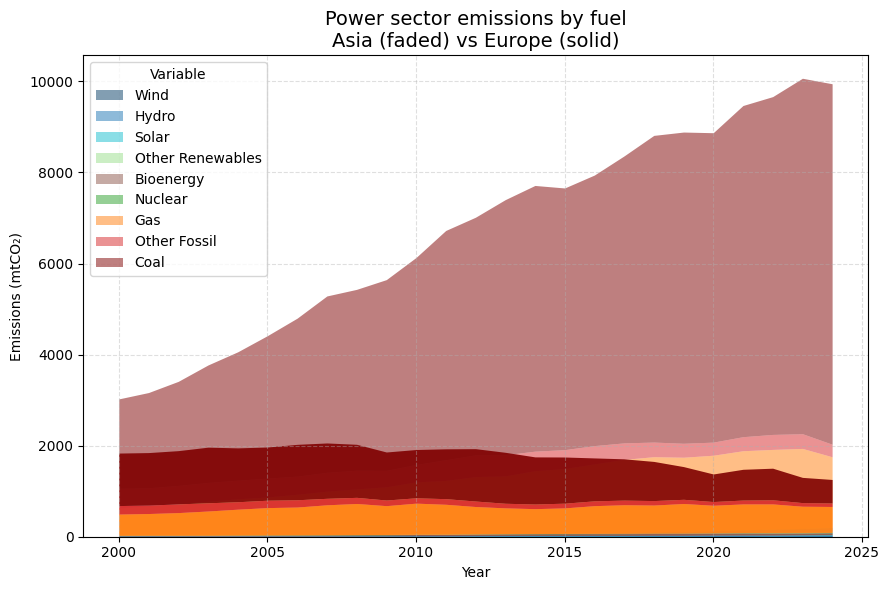

In [2]:
import pandas as pd
import matplotlib.pyplot as plt



asia_emissions = (
    df_asia_emissions
    .groupby(["Year", "Variable"], as_index=False)["Value"]
    .sum()
)

europe_emissions = (
    df_europe_emissions
    .groupby(["Year", "Variable"], as_index=False)["Value"]
    .sum()
)



mix_pivot_asia = (
    asia_emissions
    .pivot(index="Year", columns="Variable", values="Value")
    .fillna(0)
)

mix_pivot_europe = (
    europe_emissions
    .pivot(index="Year", columns="Variable", values="Value")
    .fillna(0)
)



all_years = sorted(set(mix_pivot_asia.index) | set(mix_pivot_europe.index))
all_fuels = sorted(set(mix_pivot_asia.columns) | set(mix_pivot_europe.columns))

mix_pivot_asia = mix_pivot_asia.reindex(index=all_years, columns=all_fuels, fill_value=0)
mix_pivot_europe = mix_pivot_europe.reindex(index=all_years, columns=all_fuels, fill_value=0)



fuel_order = [
    "Wind",
    "Hydro",
    "Solar",
    "Other Renewables",
    "Bioenergy",
    "Nuclear",
    "Gas",
    "Other Fossil",
    "Coal"
]


present_fuels = [f for f in fuel_order if f in mix_pivot_asia.columns]

mix_pivot_asia = mix_pivot_asia[present_fuels]
mix_pivot_europe = mix_pivot_europe[present_fuels]



energy_color_map = {
    "Wind": "#073e66",
    "Hydro": "#1f77b4",
    "Solar": "#17becf",
    "Other Renewables": "#98df8a",
    "Nuclear": "#2ca02c",
    "Bioenergy": "#8c564b",
    "Gas": "#ff7f0e",
    "Other Fossil": "#d62728",
    "Coal": "#7f0000"
}

colors = [energy_color_map[f] for f in present_fuels]



fig, ax = plt.subplots(figsize=(9, 6))


mix_pivot_asia.plot(
    kind="area",
    stacked=True,
    linewidth=0,
    ax=ax,
    color=colors,
    alpha=0.5
)


mix_pivot_europe.plot(
    kind="area",
    stacked=True,
    linewidth=0,
    ax=ax,
    color=colors,
    alpha=0.9,
    legend=False   
)

ax.set_title(
    "Power sector emissions by fuel\nAsia (faded) vs Europe (solid)",
    fontsize=14
)
ax.set_xlabel("Year")
ax.set_ylabel("Emissions (mtCO₂)")

ax.grid(True, axis="both", linestyle="--", alpha=0.4)


plt.tight_layout()
plt.show()


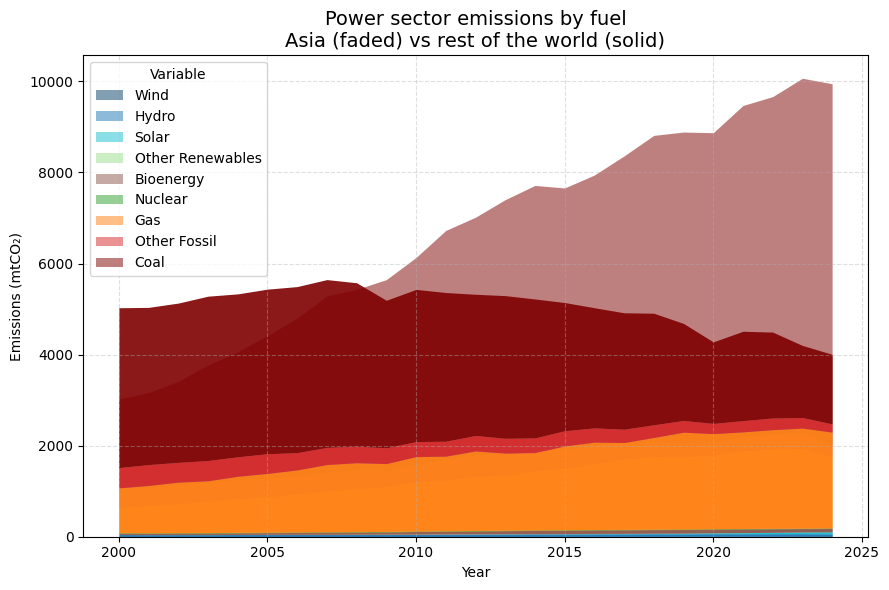

In [3]:
import pandas as pd
import matplotlib.pyplot as plt



asia_emissions = (
    df_asia_emissions
    .groupby(["Year", "Variable"], as_index=False)["Value"]
    .sum()
)

df_notasia_emissions_emissions = (
    df_notasia_emissions
    .groupby(["Year", "Variable"], as_index=False)["Value"]
    .sum()
)



mix_pivot_asia = (
    asia_emissions
    .pivot(index="Year", columns="Variable", values="Value")
    .fillna(0)
)

mix_pivot_notasia = (
    df_notasia_emissions_emissions
    .pivot(index="Year", columns="Variable", values="Value")
    .fillna(0)
)



all_years = sorted(set(mix_pivot_asia.index) | set(mix_pivot_europe.index))
all_fuels = sorted(set(mix_pivot_asia.columns) | set(mix_pivot_europe.columns))

mix_pivot_asia = mix_pivot_asia.reindex(index=all_years, columns=all_fuels, fill_value=0)
mix_pivot_notasia = mix_pivot_notasia.reindex(index=all_years, columns=all_fuels, fill_value=0)



fuel_order = [
    "Wind",
    "Hydro",
    "Solar",
    "Other Renewables",
    "Bioenergy",
    "Nuclear",
    "Gas",
    "Other Fossil",
    "Coal"
]


present_fuels = [f for f in fuel_order if f in mix_pivot_asia.columns]

mix_pivot_asia = mix_pivot_asia[present_fuels]
mix_pivot_notasia = mix_pivot_notasia[present_fuels]



energy_color_map = {
    "Wind": "#073e66",
    "Hydro": "#1f77b4",
    "Solar": "#17becf",
    "Other Renewables": "#98df8a",
    "Nuclear": "#2ca02c",
    "Bioenergy": "#8c564b",
    "Gas": "#ff7f0e",
    "Other Fossil": "#d62728",
    "Coal": "#7f0000"
}

colors = [energy_color_map[f] for f in present_fuels]



fig, ax = plt.subplots(figsize=(9, 6))


mix_pivot_asia.plot(
    kind="area",
    stacked=True,
    linewidth=0,
    ax=ax,
    color=colors,
    alpha=0.5
)


mix_pivot_notasia.plot(
    kind="area",
    stacked=True,
    linewidth=0,
    ax=ax,
    color=colors,
    alpha=0.9,
    legend=False   
)

ax.set_title(
    "Power sector emissions by fuel\nAsia (faded) vs rest of the world (solid)",
    fontsize=14
)
ax.set_xlabel("Year")
ax.set_ylabel("Emissions (mtCO₂)")

ax.grid(True, axis="both", linestyle="--", alpha=0.4)


plt.tight_layout()
plt.show()
